In [1]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)

In [5]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [6]:
x_train/=225
x_test/=225

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [26]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0162 - accuracy: 0.9944
Epoch 2/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0152 - accuracy: 0.9947
Epoch 3/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0144 - accuracy: 0.9953
Epoch 4/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0125 - accuracy: 0.9958
Epoch 5/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0131 - accuracy: 0.9953
Epoch 6/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0133 - accuracy: 0.9953
Epoch 7/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0128 - accuracy: 0.9953
Epoch 8/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0109 - accuracy: 0.9961
Epoch 9/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0128 - accuracy: 0.9959
Epoch 10/10
1875/1875 [==============================] - 64s 34

In [9]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 13ms/step - loss: 0.0690 - accuracy: 0.9837


[0.06902953237295151, 0.9836999773979187]

In [10]:
y_predict=model.predict(x_test)
y_predict

array([[5.9195747e-12, 7.2707893e-13, 1.9852538e-12, ..., 1.0000000e+00,
        4.9434059e-12, 1.7776468e-08],
       [9.4588888e-13, 3.4880262e-08, 1.0000000e+00, ..., 6.5342305e-18,
        1.8316206e-16, 6.9461086e-25],
       [1.4693606e-10, 9.9995995e-01, 1.3761458e-07, ..., 9.1702723e-06,
        2.6749047e-05, 2.7205671e-09],
       ...,
       [1.4638224e-28, 2.8168260e-14, 7.1308577e-23, ..., 2.9573765e-12,
        6.4475850e-13, 1.5773282e-11],
       [1.3289594e-15, 5.9178722e-21, 3.1855381e-24, ..., 6.7722032e-21,
        8.8479067e-07, 4.4711961e-17],
       [3.6997242e-11, 4.0771836e-16, 8.0665556e-15, ..., 3.5454394e-17,
        3.1398668e-11, 2.4668810e-14]], dtype=float32)

In [21]:
y_predicts = np.argmax(model.predict(x_test), axis=-1)
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

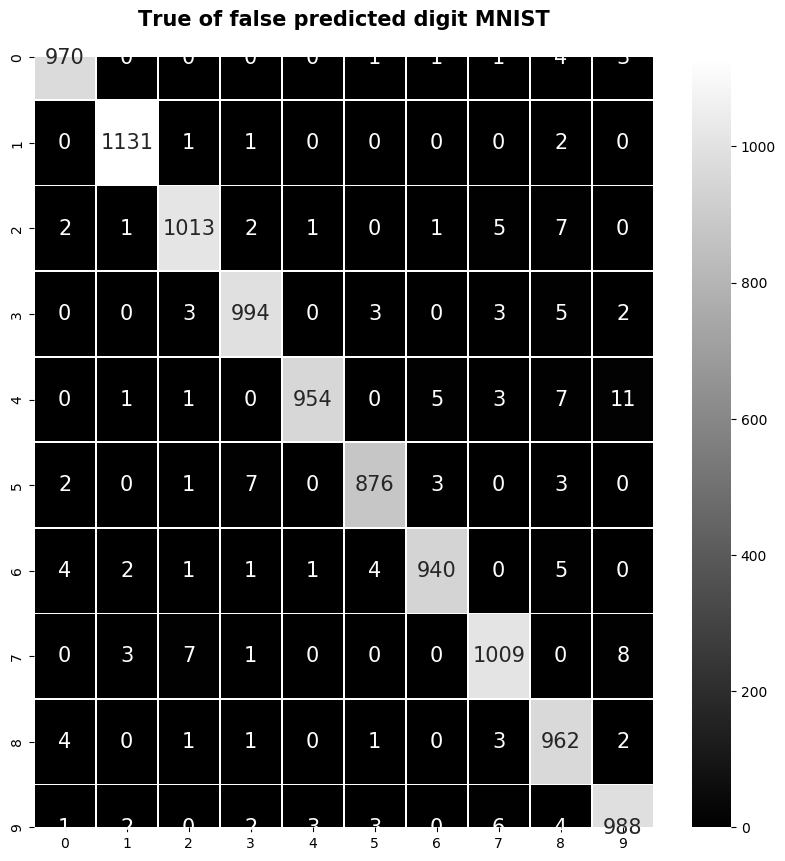

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
con_mat = confusion_matrix(y_test, y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt='d',cmap='gray')
plt.title('True of false predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicts))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.99      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



6


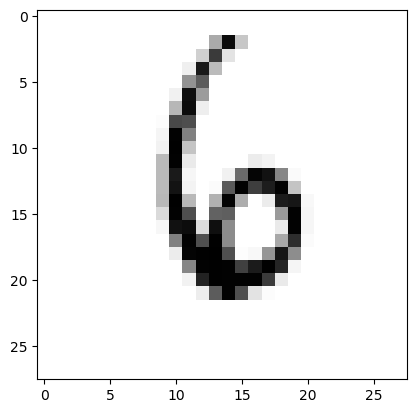

In [19]:
import matplotlib.pyplot as plt
image_index=6900
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')
predict=x_test[image_index].reshape(28,28)
pred=model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred.argmax())